# Attrition of Companies:

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork 
and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular 
employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. 
This is especially concerning if your business is customer facing, as customers often prefer to interact with familiar 
people. Errors and issues are more likely if you constantly have new workers.


So here we will predict the Employee Attrition from the dataset using different Classification techniques.

# 1-Data Exploration

In [1]:
#Importing all basic required libray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#lets import the HR data and print them
hrdata=pd.read_csv('HR_Analysis_Employee_Attrition.csv')
print(hrdata.shape)

print(hrdata.head(10))

(1470, 35)
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   
7   30        No      Travel_Rarely       1358  Research & Development   
8   38        No  Travel_Frequently        216  Research & Development   
9   36        No      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1             

In [3]:
#checking the information of the data and is there any null values present
hrdata.info()

#so by looking the information, here there are no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
#lets see the data description
hrdata.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# 2-Exploratory Data Analysis (Exploring, Cleaning, Imputing & Visualizing)

In [5]:
#lets again see the data
hrdata.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [6]:
#lets print all the columns
hrdata.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

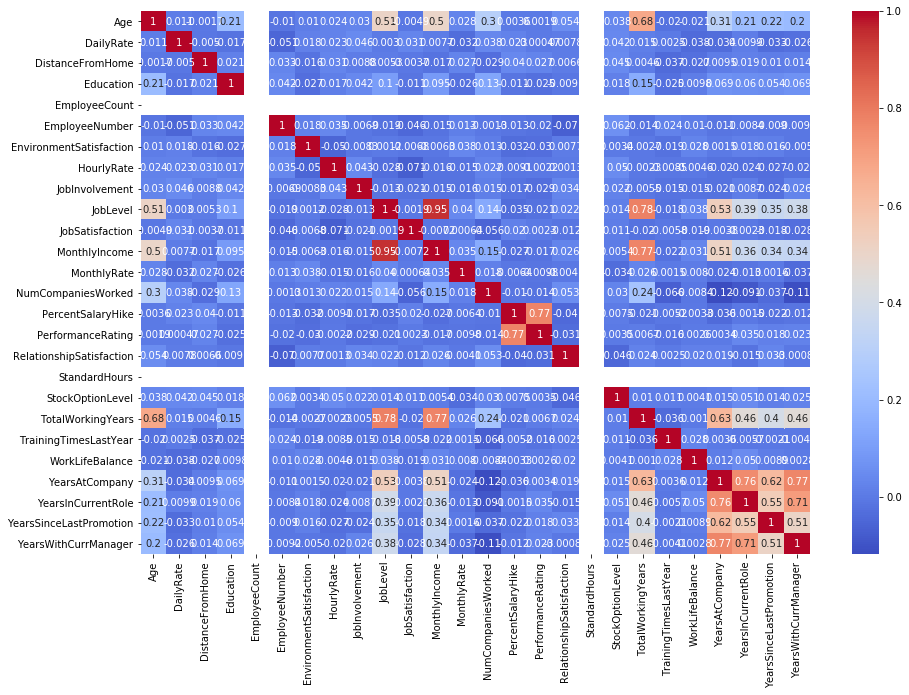

In [7]:
#lets see the corelation among data wrt Attrition
plt.figure(figsize=(15,10))
sns.heatmap(hrdata.corr(),cmap='coolwarm',annot=True)

In [8]:
#so by looking to the corelartion, here as StandardHours attribute does not play any role, so we can drop from data set
hrdata=hrdata.drop(columns=['StandardHours'])
print(hrdata.head(6))
print(hrdata.shape)

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   
5

In [9]:
#so by looking the data, here so many attributes datatype are object, so first we have to encode them to numerical value
#so we will use level encoder to Attrition column and one hot encoding technique to other categorical columns

#lets first see the Attrition column values 
print(hrdata['Attrition'].describe())

#so as there are 2 unique value with Yes and No, we will go for numerical value using level encoder.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
hrdata['Attrition']=le.fit_transform(hrdata['Attrition'])
print(hrdata.head())

#so here No->0, Yes->1


count     1470
unique       2
top         No
freq      1233
Name: Attrition, dtype: object
   Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical             

In [10]:
# Now lets go for other value to encode using one hot encoding technique.
from sklearn.preprocessing import OneHotEncoder
hrdata_encode=pd.get_dummies(hrdata)
print(hrdata_encode.head())
print(hrdata_encode.shape)

   Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0   41          1       1102                 1          2              1   
1   49          0        279                 8          1              1   
2   37          1       1373                 2          2              1   
3   33          0       1392                 3          4              1   
4   27          0        591                 2          1              1   

   EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  ...  \
0               1                        2          94               3  ...   
1               2                        3          61               2  ...   
2               4                        4          92               2  ...   
3               5                        4          56               3  ...   
4               7                        1          40               3  ...   

   JobRole_Research Director  JobRole_Research Scientist  \
0       

In [11]:
#lets separating the input and output/target variables
df_x=hrdata_encode.drop(columns=['Attrition'])
y=hrdata_encode[['Attrition']]

print(df_x.shape)
print(y.shape)

(1470, 54)
(1470, 1)


In [12]:
#scaling the input variables using min max scaler
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,5))
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

# 3-Building Different Model and Finding the Best Model

In [13]:
#lets print the shape of both input and target dataset
print(x.shape)
print(y.shape)

(1470, 54)
(1470, 1)


In [14]:
#dividing the train and test dataset
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(1176, 54) (294, 54)
(1176, 1) (294, 1)


In [15]:
#defining the models which will be used for model building
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.svm import SVC
sv=SVC()
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
from sklearn.ensemble import GradientBoostingClassifier
gd=GradientBoostingClassifier()

In [16]:
#appending all the models
models=[]
models.append(('LogisticRegression',lr))
models.append(('SVC',sv))
models.append(('KNeighborsClassifier',knn))
models.append(('DecisionTreeClassifier',dtc))
models.append(('GaussianNB',gnb))
models.append(('MultinomialNB',mnb))
models.append(('AdaBoostClassifier',ad))
models.append(('GradientBoostingClassifier',gd))

In [17]:
#lets import all the classification outputs
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

************************ LogisticRegression **********************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score: 0.8605442176870748


Cross Value Score: 0.882312925170068


roc_auc_score: 0.6499698509776898


Classification Report:               precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294



Confusion Matrix:
 [[237  10]
 [ 31  16]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



************************ SVC ********************

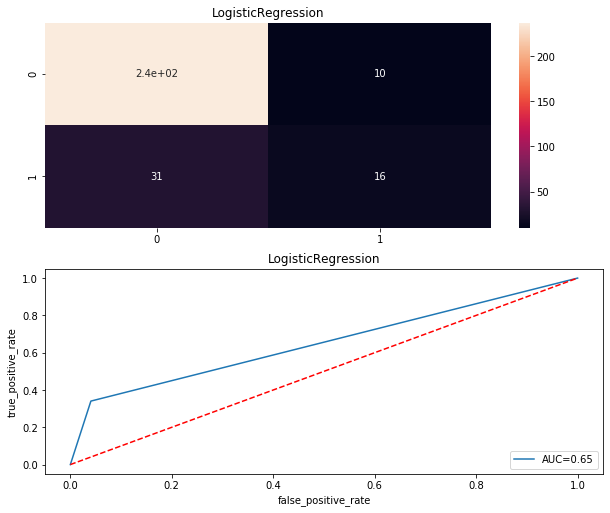

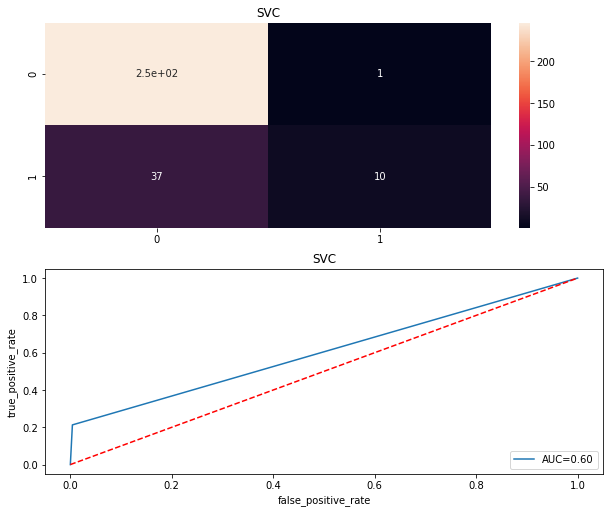

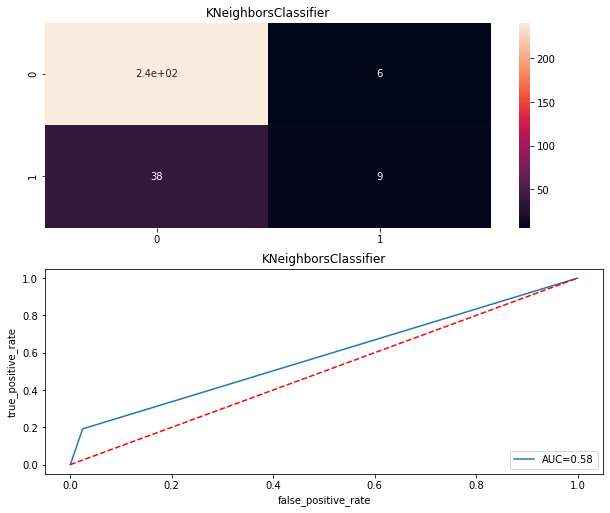

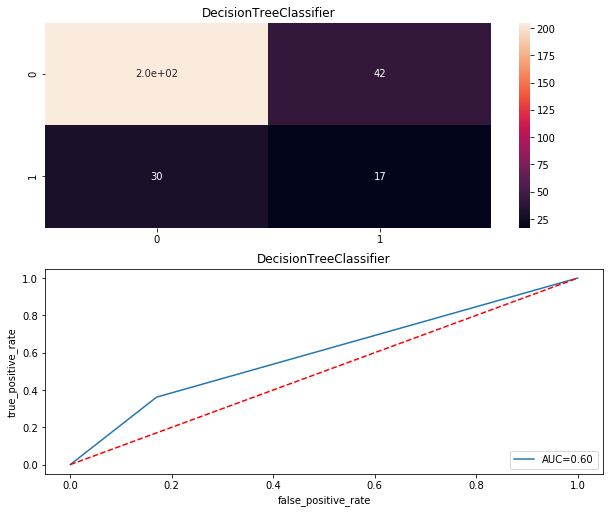

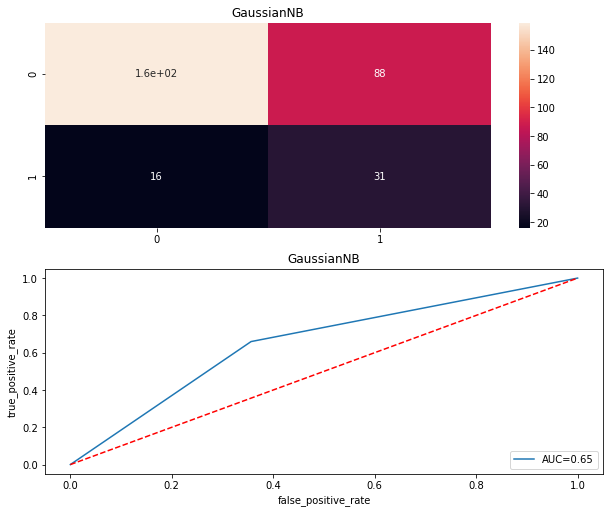

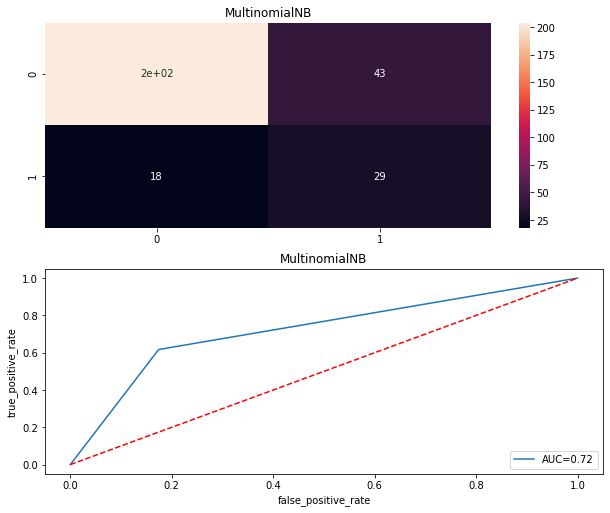

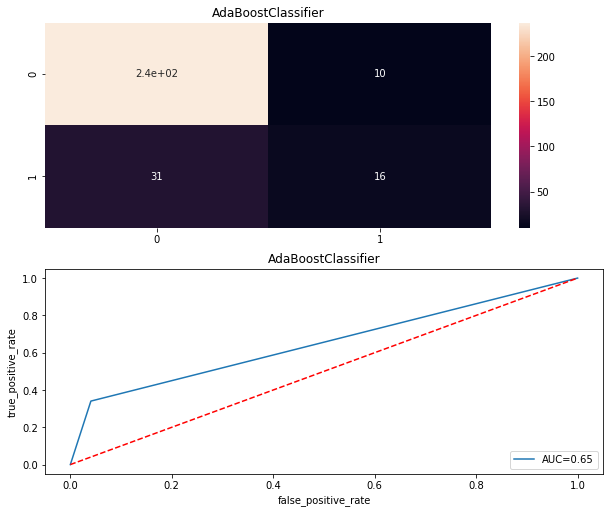

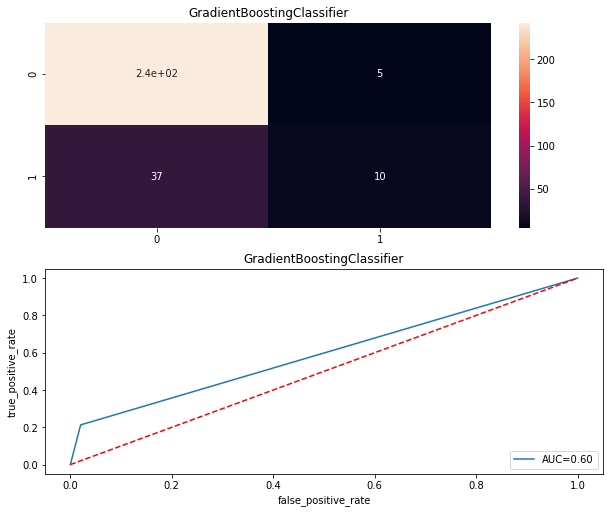

In [18]:
#printing the output of each model
Model=[]
score=[]
cvs=[]
rocscore=[]
for name, model in models:
    print('************************',name,'**********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pred)
    print('Accuracy Score:',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model, x,y,cv=10,scoring='accuracy').mean()
    print('Cross Value Score:',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, threshold= roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score:',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    cr=classification_report(y_test,pred)
    print('Classification Report:',cr )
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print('Confusion Matrix:\n',cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('true_positive_rate')
    plt.xlabel('false_positive_rate')
    print('\n\n')

In [19]:
#lets print the final result of all the models
result=pd.DataFrame({'Model':Model,'Accuracy_Score':score,'Cross_Value_Score':cvs,'Roc_Auc_Curve':rocscore})
print(result)

                        Model  Accuracy_Score  Cross_Value_Score  \
0          LogisticRegression       86.054422          88.231293   
1                         SVC       87.074830          86.326531   
2        KNeighborsClassifier       85.034014          84.829932   
3      DecisionTreeClassifier       75.510204          75.510204   
4                  GaussianNB       64.625850          68.163265   
5               MultinomialNB       79.251701          77.142857   
6          AdaBoostClassifier       86.054422          87.074830   
7  GradientBoostingClassifier       85.714286          84.761905   

   Roc_Auc_Curve  
0      64.996985  
1      60.435869  
2      58.359893  
3      59.583082  
4      65.164958  
5      72.146610  
6      64.996985  
7      59.626152  


In [20]:
# So here LogisticRegression is the best model, so lets find out the best parameter for this to get maximum score
#lets use grid search method to find optimal value 

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lgreg=LogisticRegression()
parameters={'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25],'random_state':range(42,100)} #l1-lasso, l2-ridge
clf=GridSearchCV(lgreg, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'C': 0.09, 'penalty': 'l2', 'random_state': 42}

In [21]:
# So lets build the final model with 'C': 0.09, 'penalty': 'l2', 'random_state': 42

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
lgreg=LogisticRegression(C=0.09,penalty='l2',random_state=42)
lgreg.fit(x_train,y_train)
pred_lg=lgreg.predict(x_test)
print('Accuracy Score is:', accuracy_score(y_test,pred_lg))
print('Cross Value Score:', cross_val_score(lgreg, x,y,cv=10,scoring='accuracy').mean())
false_positive_rate, true_positive_rate, threshold= roc_curve(y_test,pred_lg)
print('ROC_AUC Score:',auc(false_positive_rate,true_positive_rate))
print('Confusion Matix:\n', confusion_matrix(y_test,pred_lg))
print('Classification Report:\n', classification_report(y_test,pred_lg))

Accuracy Score is: 0.9081632653061225
Cross Value Score: 0.8829931972789116
ROC_AUC Score: 0.7596423562412342
Confusion Matix:
 [[242   6]
 [ 21  25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       248
           1       0.81      0.54      0.65        46

    accuracy                           0.91       294
   macro avg       0.86      0.76      0.80       294
weighted avg       0.90      0.91      0.90       294



AxesSubplot(0.125,0.808774;0.62x0.0712264)


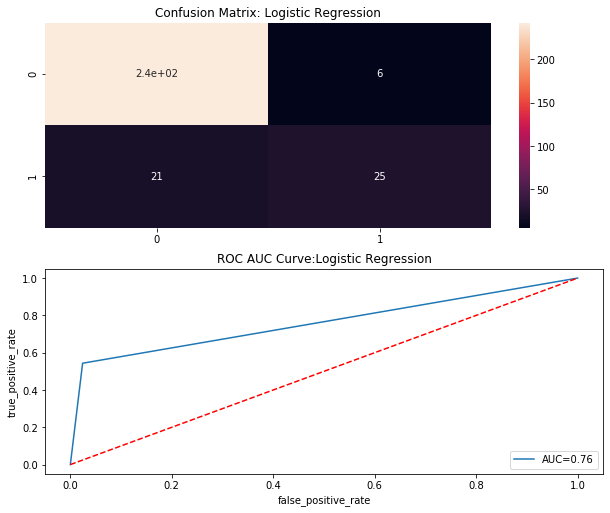

In [22]:
#lets print the confusion matrix and roc auc curve
cm=confusion_matrix(y_test,pred_lg)
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title('Confusion Matrix: Logistic Regression')
print(sns.heatmap(cm,annot=True))
plt.subplot(912)

roc_auc=auc(false_positive_rate,true_positive_rate)
plt.title('ROC AUC Curve:Logistic Regression')
plt.xlabel('false_positive_rate')
plt.ylabel('true_positive_rate')
plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')  


In [23]:
#lets predict the Attrition of Employees
print('Actual Attrition:\n',y_test)
print('Predicted Attrition:\n',pred_lg)


Actual Attrition:
       Attrition
571           0
1385          0
624           0
119           0
767           0
...         ...
750           0
39            0
1             0
341           0
1111          1

[294 rows x 1 columns]
Predicted Attrition:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


In [24]:
#saving the final model
from sklearn.externals import joblib
#save the model as joblib in a file
joblib.dump(lgreg,'lgreg_Attrition.obj')

['lgreg_Attrition.obj']

In [25]:
# load the model from the file
Attrition_from_joblib=joblib.load('lgreg_Attrition.obj')

In [26]:
#Use the loaded model to make predictions against test data
Attrition_from_joblib.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0])

# Conclusion:
    
So here 'LogisticRegressor Model' is the best model out of all model tested above and by looking this we can conclude
that our model is predicting around 91% of correct results for predicting the Attrition of Employees.